<a href="https://colab.research.google.com/github/hy2212/Churn_for_Bank_Customers/blob/main/Copy_of_Predicting_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np

In [93]:
pip install pingouin

In [94]:
df = pd.read_csv('https://raw.githubusercontent.com/hy2212/Churn_for_Bank_Customers/main/churn.csv')
df=df.dropna()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [95]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# Correlation


In [96]:
# install the software
import pingouin as pg

### The pairwise correlation 
https://pingouin-stats.org/generated/pingouin.pairwise_corr.html#pingouin.pairwise_corr

In [97]:
pg.pairwise_corr(df,columns=['CreditScore', 'Age'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,CreditScore,Age,pearson,two-sided,10000,-0.004,"[-0.02, 0.02]",0.0,-0.0,-0.004,0.692,0.014,0.068


In [98]:
pg.pairwise_corr(df,columns=['CreditScore', 'Age','EstimatedSalary'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,CreditScore,Age,pearson,two-sided,10000,-0.004,"[-0.02, 0.02]",0.0,-0.0,-0.004,0.692,0.014,0.068
1,CreditScore,EstimatedSalary,pearson,two-sided,10000,-0.001,"[-0.02, 0.02]",0.0,-0.0,-0.001,0.890,0.013,0.052
2,Age,EstimatedSalary,pearson,two-sided,10000,-0.007,"[-0.03, 0.01]",0.0,-0.0,-0.007,0.472,0.016,0.111


### The Partial correlation
https://pingouin-stats.org/generated/pingouin.partial_corr.html#pingouin.partial_corr

In [99]:
# Partial correlation of CreditScore and Age controlling for EstimatedSalary
x='CreditScore'
y='Age'
control='EstimatedSalary'
pg.partial_corr(data=df, x=x, y=y, covar=control,
                method='pearson').round(3)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,10000,-0.004,"[-0.02, 0.02]",0.0,-0.0,0.691,0.014,0.068


# Regression

## Scatterplot
https://seaborn.pydata.org/generated/seaborn.scatterplot.html


In [100]:
#install the package
import seaborn as sns

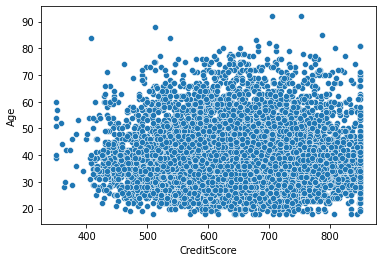

In [101]:
x='CreditScore'
y='Age'
sns.scatterplot(data=df, x=x, y=y)

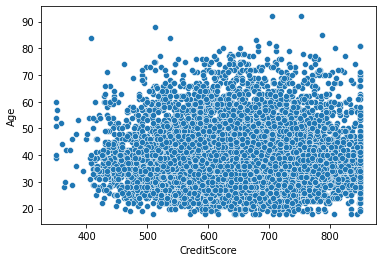

In [102]:
x='CreditScore'
y='Age'
sns.scatterplot(data=df, x=x, y=y)

### Regression Result
https://www.statsmodels.org/stable/regression.html

In [103]:
import statsmodels.api as sm

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [105]:
# define the dependent and independent variables
X=df[['CreditScore','Age']]
y=df['EstimatedSalary']


In [106]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

,const,CreditScore,Age
0,1.0,619,42
1,1.0,608,41
2,1.0,502,42
3,1.0,699,39
4,1.0,850,43


In [107]:
# conduct regression
model = sm.OLS(y, X).fit()

In [108]:
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        EstimatedSalary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2692
Date:                Thu, 03 Dec 2020   Prob (F-statistic):              0.764
Time:                        13:28:36   Log-Likelihood:            -1.2379e+05
No. Observations:               10000   AIC:                         2.476e+05
Df Residuals:                    9997   BIC:                         2.476e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.022e+05   4465.367     22.882      

### Check assumptions

In [109]:
### get the residuals
predictions = model.predict(X)
residuals =y-predictions
df_res=pd.DataFrame({'Residual': residuals, 'Prediction': predictions})
df_res.head()

,Residual,Prediction
0,1353.778899,99995.101101
1,12498.713351,100043.866649
2,13838.109151,100093.460849
3,-6219.770723,100046.400723
4,-20677.285599,99761.385599


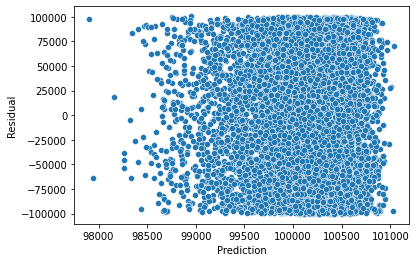

In [110]:
#print the scatter plot between residuals and predicitions
x='Prediction'
y='Residual'
sns.scatterplot(data=df_res, x=x, y=y)

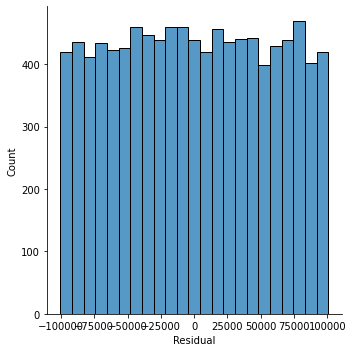

In [111]:
# histogram of the residual
sns.displot(df_res, x="Residual")

In [112]:
x=df_res['Residual']
pg.normality(x)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
Residual,0.956695,0.0,False


In [113]:
pg.pairwise_corr(df,columns=['CreditScore','Age'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,CreditScore,Age,pearson,two-sided,10000,-0.004,"[-0.02, 0.02]",0.0,-0.0,-0.004,0.692,0.014,0.068


#Logit Analysis

In [114]:
y=df['HasCrCard']
X=df[['CreditScore','Age','EstimatedSalary']]

In [115]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

,const,CreditScore,Age,EstimatedSalary
0,1.0,619,42,101348.88
1,1.0,608,41,112542.58
2,1.0,502,42,113931.57
3,1.0,699,39,93826.63
4,1.0,850,43,79084.10


In [116]:
# conduct regression
logit_model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.605998
         Iterations 5


In [117]:
# print model summary
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:              HasCrCard   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Thu, 03 Dec 2020   Pseudo R-squ.:               0.0002209
Time:                        13:28:37   Log-Likelihood:                -6060.0
converged:                       True   LL-Null:                       -6061.3
Covariance Type:            nonrobust   LLR p-value:                    0.4441
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0894      0.175      6.232      0.000       0.747       1.432
CreditScore        -0.0001      0.000     -0.552      0.581      -0.001       0.000
Age                -0.0025      

In [118]:
### get the odds ratio
np.exp(logit_model.params)

const              2.972504
CreditScore        0.999875
Age                0.997544
EstimatedSalary    1.000000
dtype: float64

In [119]:
### get the predictions 
pred_prob = logit_model.predict(X)
df_result=pd.DataFrame({'Pred_prob': pred_prob,'y':y})
df_result['Prediction']=df_result['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_result.head()

,Pred_prob,y,Prediction
0,0.704702,1,1
1,0.704609,0,1
2,0.706746,1,1
3,0.704751,0,1
4,0.699919,1,1


In [120]:
from sklearn.metrics import accuracy_score
Prediction = df_result['Prediction']
accuracy_score(y, Prediction)

0.7055

# Cross Validation

In [121]:
## get the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [122]:
# conduct regression
logit_model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.606595
         Iterations 5


In [123]:
# print model summary
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:              HasCrCard   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7996
Method:                           MLE   Df Model:                            3
Date:                Thu, 03 Dec 2020   Pseudo R-squ.:               0.0003139
Time:                        13:28:37   Log-Likelihood:                -4852.8
converged:                       True   LL-Null:                       -4854.3
Covariance Type:            nonrobust   LLR p-value:                    0.3844
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.1633      0.196      5.940      0.000       0.779       1.547
CreditScore        -0.0002      0.000     -0.944      0.345      -0.001       0.000
Age                -0.0023      

In [124]:
### get the predictions on the test data
pred_prob = logit_model.predict(X_test)
df_test=pd.DataFrame({'Pred_prob': pred_prob,'y_test':y_test})
df_test['Prediction']=df_test['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_test.head()

,Pred_prob,y_test,Prediction
1553,0.715898,0,1
1466,0.719535,1,1
9325,0.708306,1,1
2142,0.697305,1,1
7416,0.718572,0,1


In [125]:
from sklearn.metrics import accuracy_score
Prediction =df_test['Prediction']
accuracy_score(y_test, Prediction)

0.7085

### draw confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [126]:
from sklearn.metrics import confusion_matrix
confmtrx = np.array(confusion_matrix(y_test, Prediction))
pd.DataFrame(confmtrx, index=['Non-Churn','Churn'],
columns=['predicted_Non_Churn', 'predicted_Churn'])

,predicted_Non_Churn,predicted_Churn
Non-Churn,0,583
Churn,0,1417


#Calculate the F1 score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [127]:
from sklearn.metrics import f1_score
f1_score(y_test, Prediction)

0.8293824992683642

# Cross validation for multiple times

In [128]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
scores = cross_val_score(log_reg, X, y, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.706 0.706 0.706 0.706 0.706 0.705 0.705 0.705 0.705 0.705]


In [129]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.705, 0.7055, 0.706)

# Appendix

In [130]:
Z =np.linspace(-100,100,10000)
P=np.exp(Z)/(1+np.exp(Z))
import plotly.express as px
fig = px.scatter(x=Z, y=P)
fig.show()